### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 63kB/s 
     |████████████████████████████████| 3.8MB 52.7MB/s 
     |████████████████████████████████| 450kB 44.2MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: google-auth-oauthlib 0.4.0
    Uninstalling google-auth-oauthlib-0.4.0:
      Successfully uninstalled google-auth-oauthlib-0.4.0
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.0
    Uninstalling tensorflow-estimator-1.15.0:
      Successfully uninstalled tensorflow-estimator-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
 import tensorflow as tf
 tf.__version__

'2.0.0'

### Collect Data

In [0]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#trainX = trainX.astype(float)
#trainY = trainY.astype(float)
#testX = testx.astype(float)
#testY = testy.astype(float)

4431872/4422102 [==============================] - 1s 0us/step


In [0]:
x_train.shape


(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
y_test.shape

(10000,)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
from tensorflow import keras
from keras.utils import normalize

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

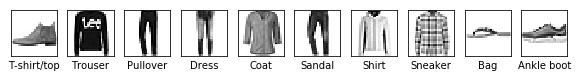

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
import matplotlib.pyplot as plt
#plt.imshow(trainX[0].reshape((28, 28)), cmap = 'gray')
plt.figure(figsize=(10,10))
for i in range (10):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[i])
plt.show()

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Flatten
import numpy as np
import keras
import tensorflow as tf

(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

#trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
#testX = testX.reshape((testX.shape[0], 28, 28, 1))

print(trainX.shape)
print(testX.shape)

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

#trainY = tf.keras.utils.to_categorical(trainY, 10)
#testY = tf.keras.utils.to_categorical(testY, 10)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)


model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10,activation='sigmoid'))


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='sgd',metrics=['accuracy'])



(60000, 28, 28)
(10000, 28, 28)


### Execute the model using model.fit()

In [34]:

epochs = 10
history = model.fit(trainX, trainY,epochs=epochs, validation_split=.1, verbose=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 135us/sample - loss: 1.9168 - accuracy: 0.5585 - val_loss: 1.7563 - val_accuracy: 0.6250
Epoch 2/10
54000/54000 [==============================] - 6s 119us/sample - loss: 1.7240 - accuracy: 0.5982 - val_loss: 1.6993 - val_accuracy: 0.5897
Epoch 3/10
54000/54000 [==============================] - 5s 86us/sample - loss: 1.6903 - accuracy: 0.5780 - val_loss: 1.6811 - val_accuracy: 0.5612
Epoch 4/10
54000/54000 [==============================] - 7s 121us/sample - loss: 1.6765 - accuracy: 0.5587 - val_loss: 1.6716 - val_accuracy: 0.5528
Epoch 5/10
54000/54000 [==============================] - 6s 111us/sample - loss: 1.6686 - accuracy: 0.5450 - val_loss: 1.6654 - val_accuracy: 0.5403
Epoch 6/10
54000/54000 [==============================] - 7s 128us/sample - loss: 1.6631 - accuracy: 0.5301 - val_loss: 1.6609 - val_accuracy: 0.5300
Epoch 7/10
54000/54000 [============================

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Flatten
import numpy as np
import keras
import tensorflow as tf

(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

#trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
#testX = testX.reshape((testX.shape[0], 28, 28, 1))

print(trainX.shape)
print(testX.shape)

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

#trainY = tf.keras.utils.to_categorical(trainY, 10)
#testY = tf.keras.utils.to_categorical(testY, 10)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)


model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10))


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='sgd',metrics=['accuracy'])

epochs = 10
batch_size = 512

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)

(60000, 28, 28)
(10000, 28, 28)
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 33us/sample - loss: 1.9056 - accuracy: 0.4117 - val_loss: 1.4806 - val_accuracy: 0.6372
Epoch 2/10
54000/54000 [==============================] - 1s 19us/sample - loss: 1.2527 - accuracy: 0.6558 - val_loss: 1.0539 - val_accuracy: 0.6842
Epoch 3/10
54000/54000 [==============================] - 1s 20us/sample - loss: 0.9746 - accuracy: 0.6906 - val_loss: 0.8789 - val_accuracy: 0.7072
Epoch 4/10
54000/54000 [==============================] - 1s 20us/sample - loss: 0.8487 - accuracy: 0.7170 - val_loss: 0.7891 - val_accuracy: 0.7410
Epoch 5/10
54000/54000 [==============================] - 1s 19us/sample - loss: 0.7757 - accuracy: 0.7413 - val_loss: 0.7322 - val_accuracy: 0.7558
Epoch 6/10
54000/54000 [==============================] - 1s 20us/sample - loss: 0.7252 - accuracy: 0.7595 - val_loss: 0.6889 - val_accuracy: 0.7677
Epoch 7/10
54000/54000 [=

### Execute the model

In [28]:
preds = model.predict(testX)
preds[0]

array([-4.6028476, -2.6104517, -1.8263761, -3.7465372, -1.2032489,
        4.6271286, -2.8197417,  4.4659343,  2.1619277,  5.3123326],
      dtype=float32)

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [38]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Flatten
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()


trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)
model = Sequential()
#Reshape data from 2D to 1D -> 28x28 to 784

#Normalize the data
model.add(Flatten())
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd_optimizer = SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 1.1290 - accuracy: 0.6540 - val_loss: 0.8556 - val_accuracy: 0.7267
Epoch 2/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.7640 - accuracy: 0.7589 - val_loss: 0.7143 - val_accuracy: 0.7632
Epoch 3/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.6608 - accuracy: 0.7867 - val_loss: 0.6518 - val_accuracy: 0.7813
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.6062 - accuracy: 0.8002 - val_loss: 0.6130 - val_accuracy: 0.7904
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5713 - accuracy: 0.8101 - val_loss: 0.5889 - val_accuracy: 0.7976
Epoch 6/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5443 - accuracy: 0.8172 - val_loss: 0.5637 - val_accuracy: 0.8044
Epoch 7/10
60000/60000 [==============================

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Flatten
import numpy as np
import keras
import tensorflow as tf




(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

from tensorflow.keras.optimizers import SGD
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)
model = Sequential()
#Reshape data from 2D to 1D -> 28x28 to 784

#Normalize the data
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd_optimizer = SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.9610 - accuracy: 0.6517 - val_loss: 0.7424 - val_accuracy: 0.7134
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.7357 - accuracy: 0.7236 - val_loss: 0.7777 - val_accuracy: 0.6833
Epoch 3/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.7022 - accuracy: 0.7416 - val_loss: 0.7514 - val_accuracy: 0.7054
Epoch 4/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.7121 - accuracy: 0.7391 - val_loss: 0.7201 - val_accuracy: 0.7400
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.6508 - accuracy: 0.7613 - val_loss: 0.7320 - val_accuracy: 0.7168
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.6910 - accuracy: 0.7449 - val_loss: 0.7639 - val_accuracy: 0.7065
Epoch 7/10
60000/60000 [==============================]

## Review model

In [39]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          multiple                  0         
_________________________________________________________________
dense_32 (Dense)             multiple                  157000    
_________________________________________________________________
dense_33 (Dense)             multiple                  2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


### Run the model

In [40]:
y_predict = model.predict(testX)
y_predict[0]

array([6.7996472e-04, 5.1088165e-04, 1.0543177e-03, 3.4799571e-03,
       3.6960915e-03, 1.2051422e-01, 1.0931541e-03, 2.3462257e-01,
       6.1605289e-03, 6.2818819e-01], dtype=float32)